In [46]:
import pandas as pd
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [42]:
def load_data(path_to_data, file_list):
    '''Load 2D images and their corresponding labels
    Parameters:
    path_to_data (str): This is the path to data
    
    Returns:
    images (np.ndarray): A numpy array of shape (N, 64, 64, 3)
    labels (np.ndarray): A numpy array of shape (N)
    
    '''
    folder_names = os.listdir(path_to_data)
    images = []
    labels = []

    for rel_path in file_list:
        image_path  = os.path.join(path_to_data, rel_path)
        try:
            img = load_img(image_path, target_size=(64, 64))
            image_arr = img_to_array(img)
            images.append(image_arr)
            
            label_folder = rel_path.split('/')[0]
            label = label_folder.split('-')[1]
            labels.append(label)

        except Exception as e:
            print(f"Error loading {image_path}: {e}")
            continue


    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [ ]:
from scipy.io import loadmat

# Load the .mat file
BASE_DIR = os.getcwd() 
DATA_PATH = os.path.join(BASE_DIR, "dog-breed-identification")

train_list_path = os.path.join(BASE_DIR, "lists/train_list.mat")
train_annotation = loadmat(train_list_path)
train_list = train_annotation['file_list']
train_list = [item[0][0] for item in train_list]

test_list_path = os.path.join(BASE_DIR, "lists/test_list.mat")
test_annotation = loadmat(test_list_path)
test_list = test_annotation['file_list']
test_list = [item[0][0] for item in test_list]

In [51]:
# Load data to train and test

# Load train
X_train, y_train = load_data(DATA_PATH, train_list)
print("Shape of training images ", X_train.shape)
print("Shape of training labels ", y_train.shape)

# Load test
X_test, y_test = load_data(DATA_PATH, test_list)
print("Shape of testing images ", X_test.shape)
print("Shape of testing labels ", y_test.shape)

Shape of training images  (12000, 64, 64, 3)
Shape of training labels  (12000,)
Shape of testing images  (8580, 64, 64, 3)
Shape of testing labels  (8580,)


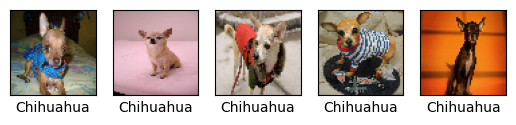

In [63]:
# Plot first 8
breeds = list(y_train[:5])
images = X_train[:5]
cols = len(breeds)
for i in range(len(breeds)):
    plt.subplot(2, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = array_to_img(images[i])
    plt.imshow(img)
    plt.xlabel(breeds[i])

plt.show();